Concrete Compressive Strength Prediction

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
df = pd.read_csv('/content/concrete_data.csv')

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [17]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [7]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [11]:
df.duplicated().sum()

25

In [12]:
df[df.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [14]:
df = df.drop_duplicates()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
blast_furnace_slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
fly_ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarse_aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fine_aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
concrete_compressive_strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [16]:
df.to_csv('compressive_strength_prediction')

EDA

In [21]:
def featureplot(col):
  plt.figure(figsize=(10, 8))
  sns.histplot(df[col],alpha =.80,kde= True)
  plt.xlabel(col.title())
  plt.ylabel('# of samples')
  plt.title(col.title())
  plt.show()

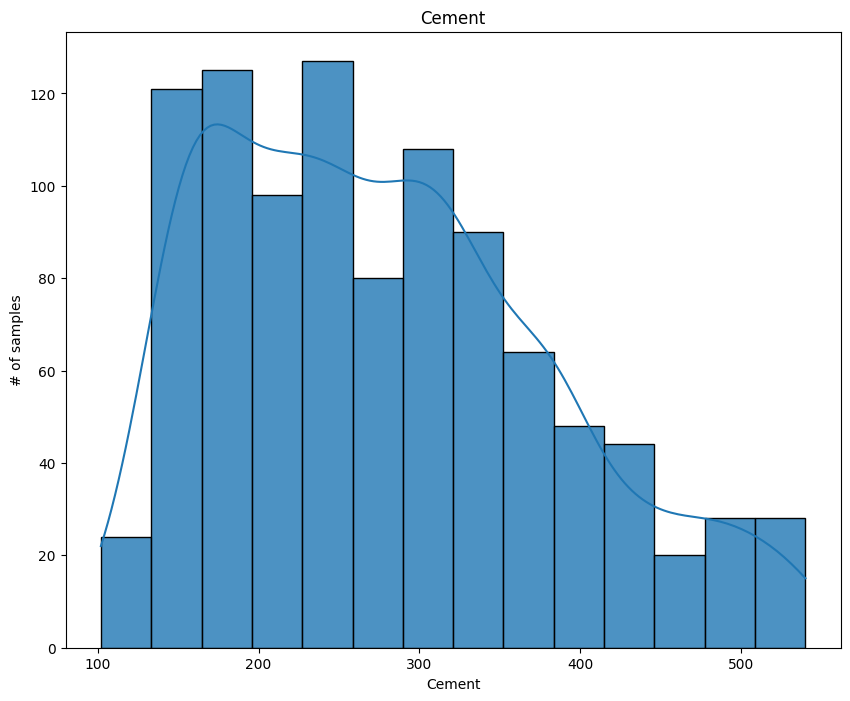

None


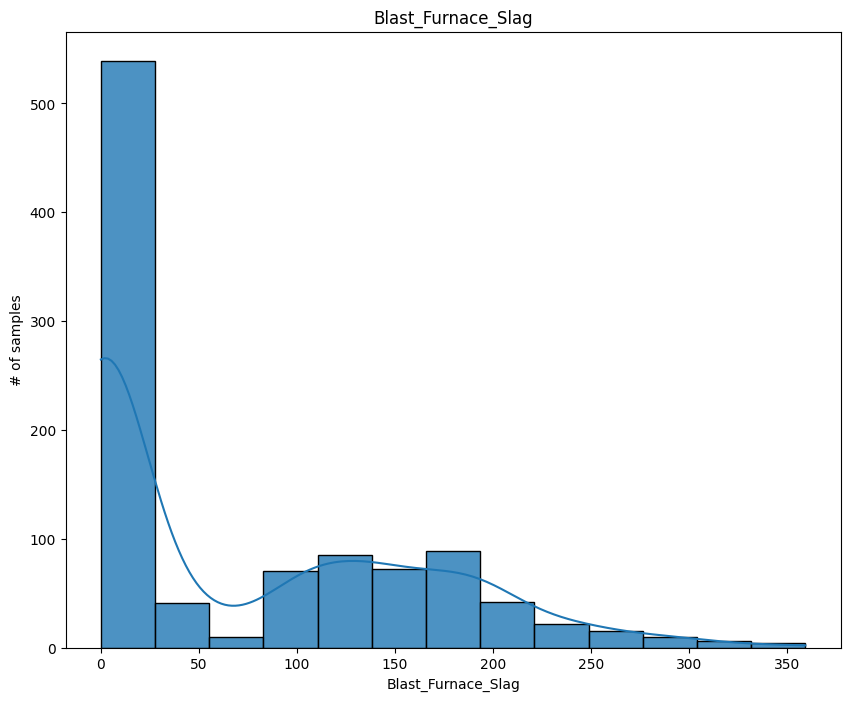

None


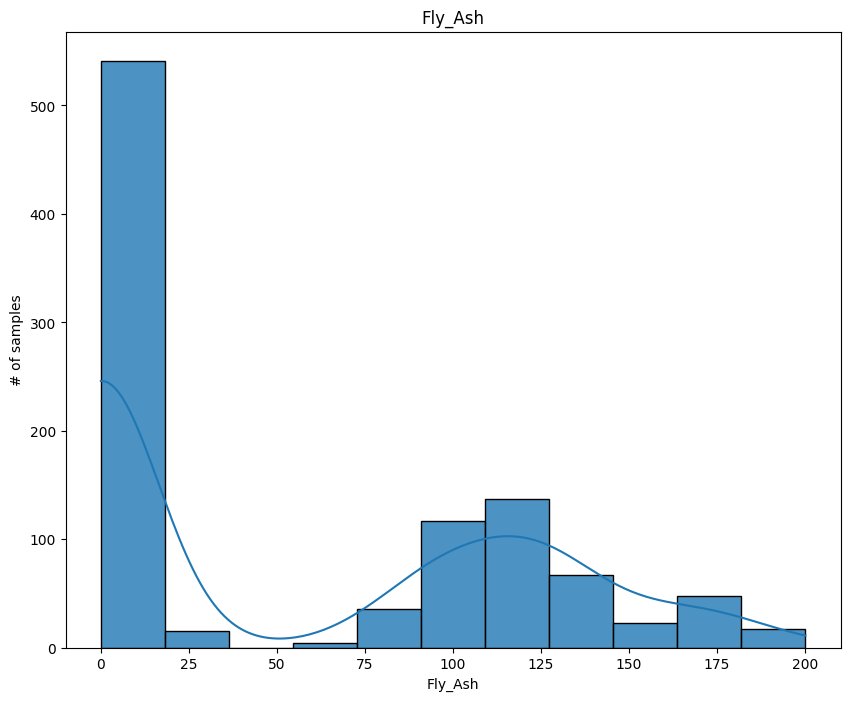

None


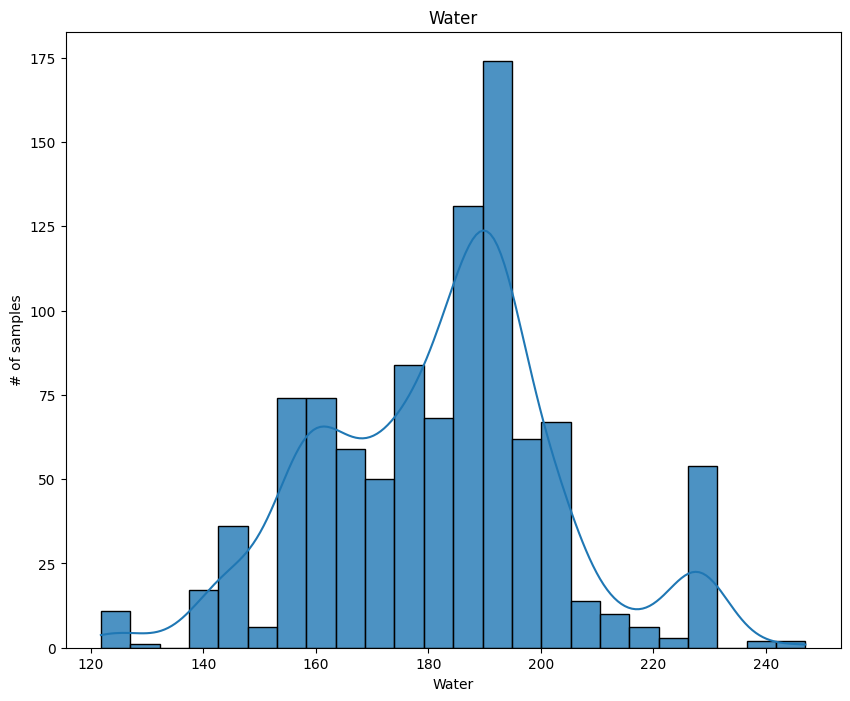

None


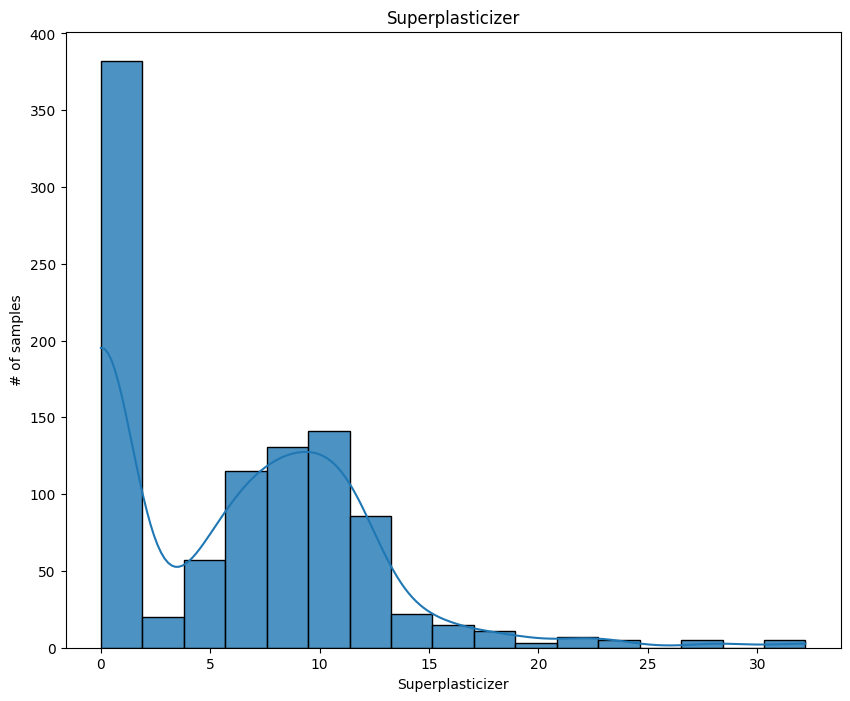

None


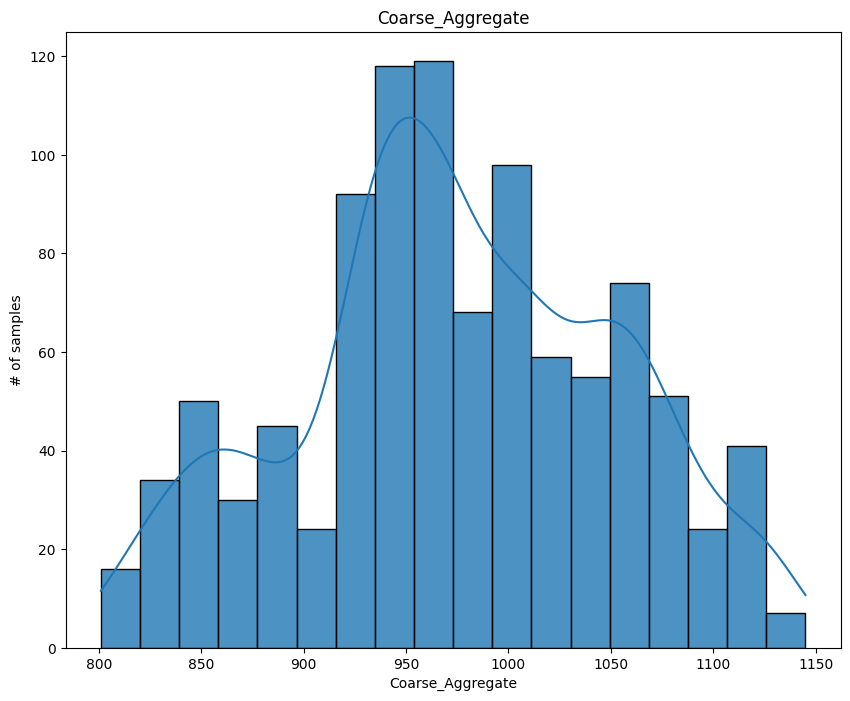

None


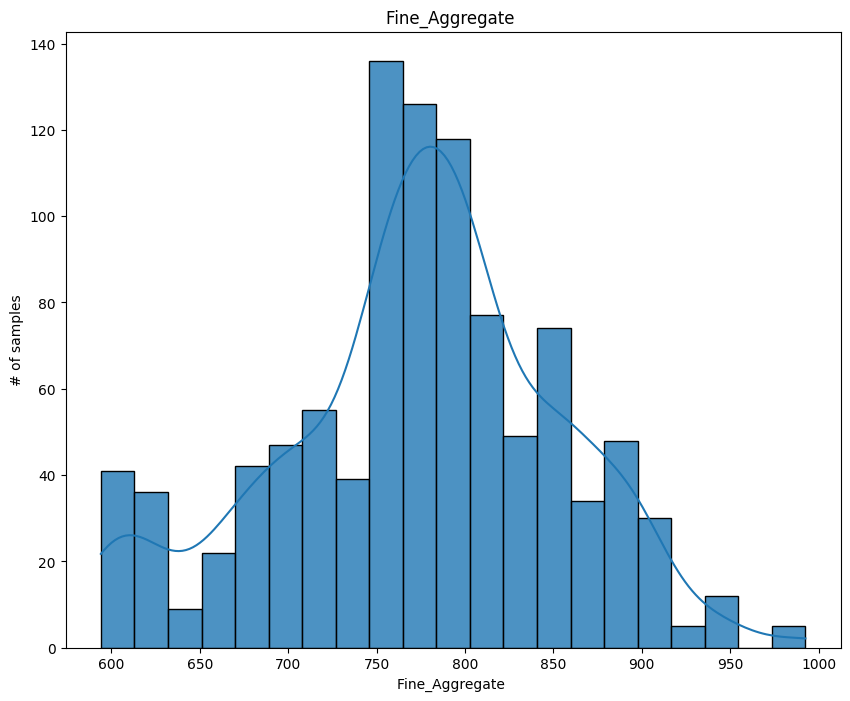

None


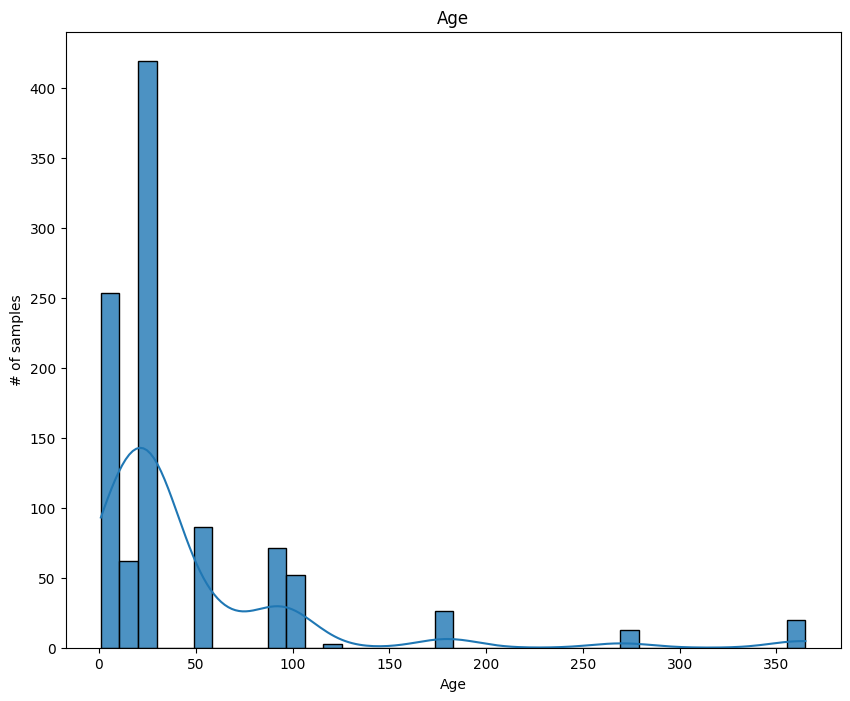

None


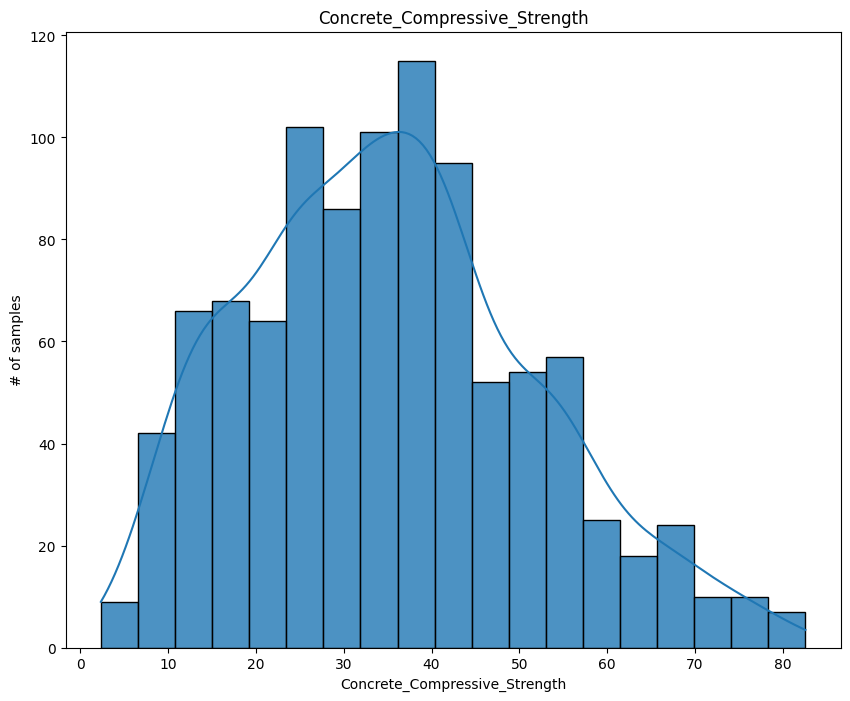

None


In [22]:
for i in df.columns:
  print(featureplot(i))

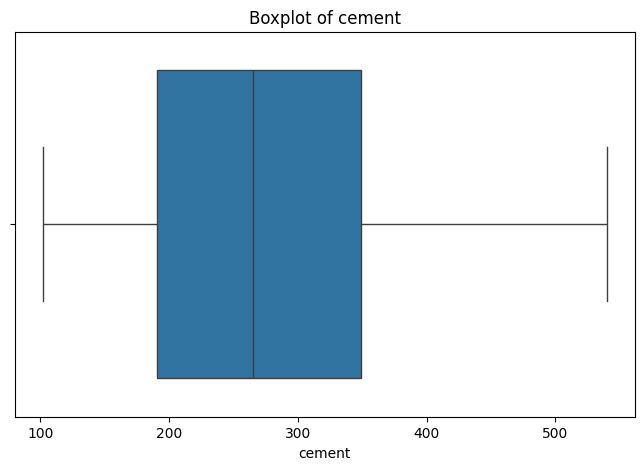

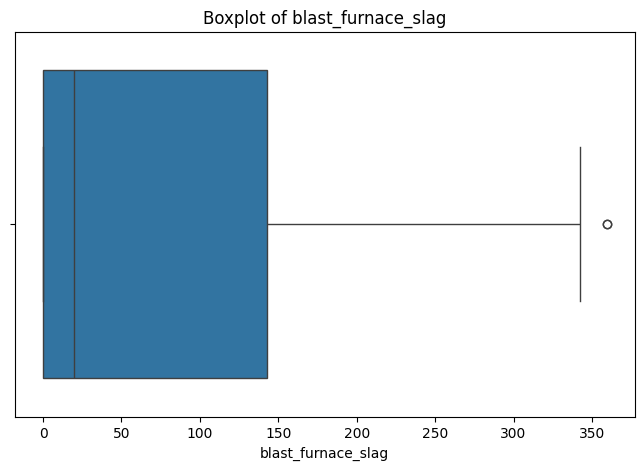

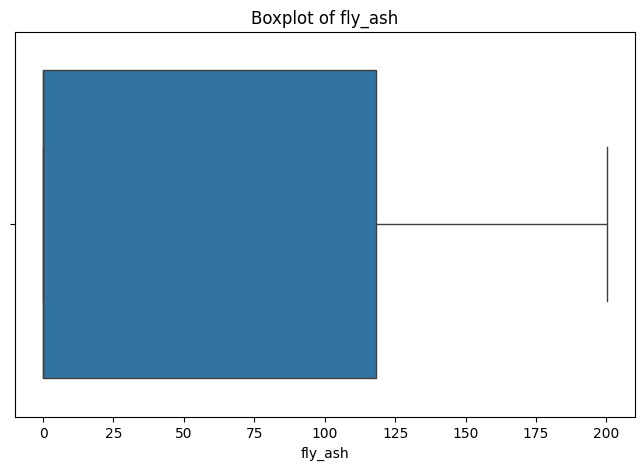

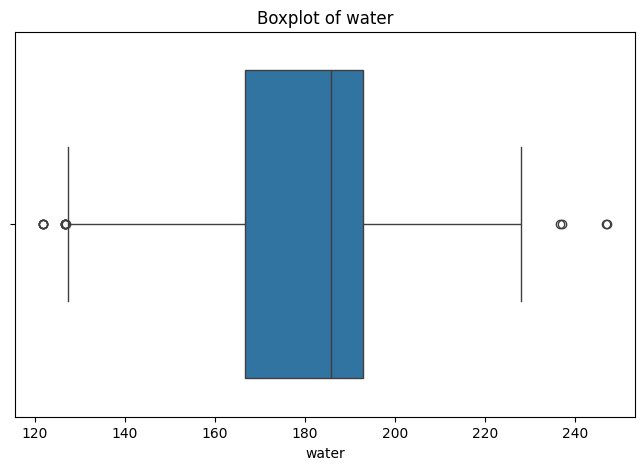

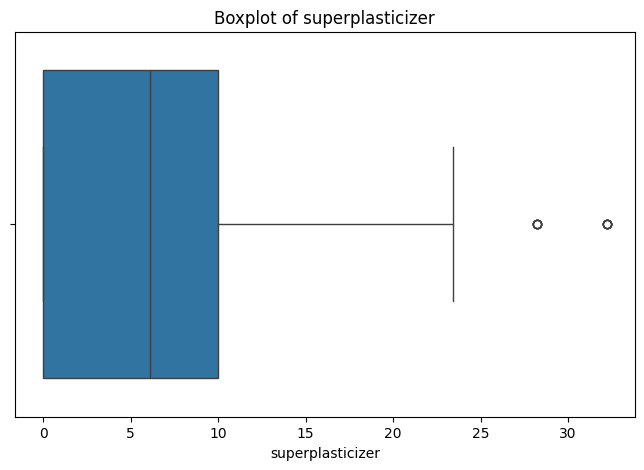

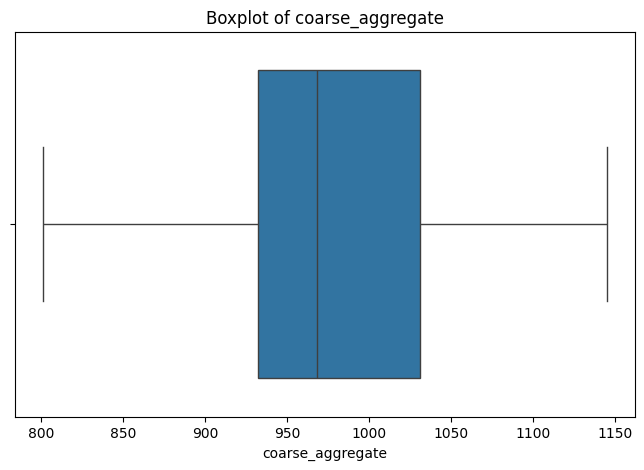

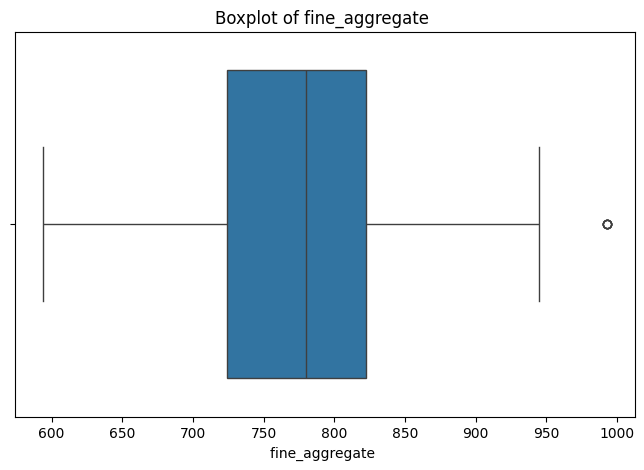

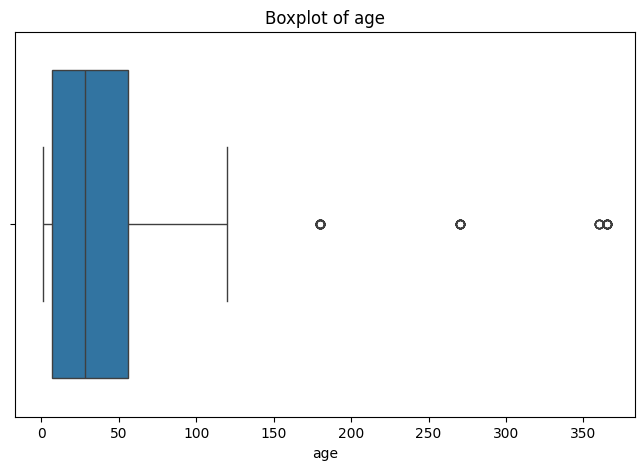

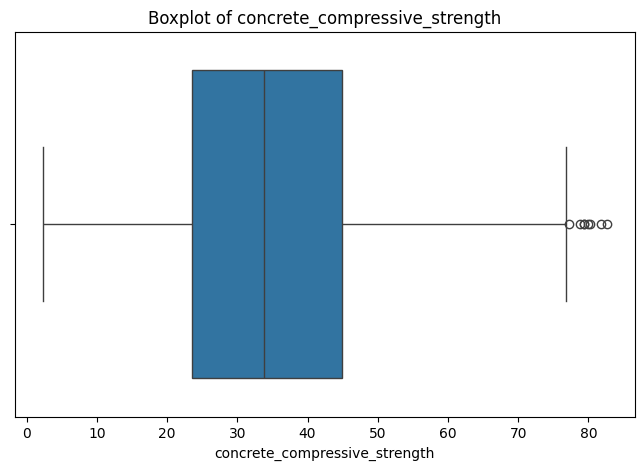

In [25]:
# checking the outliers
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

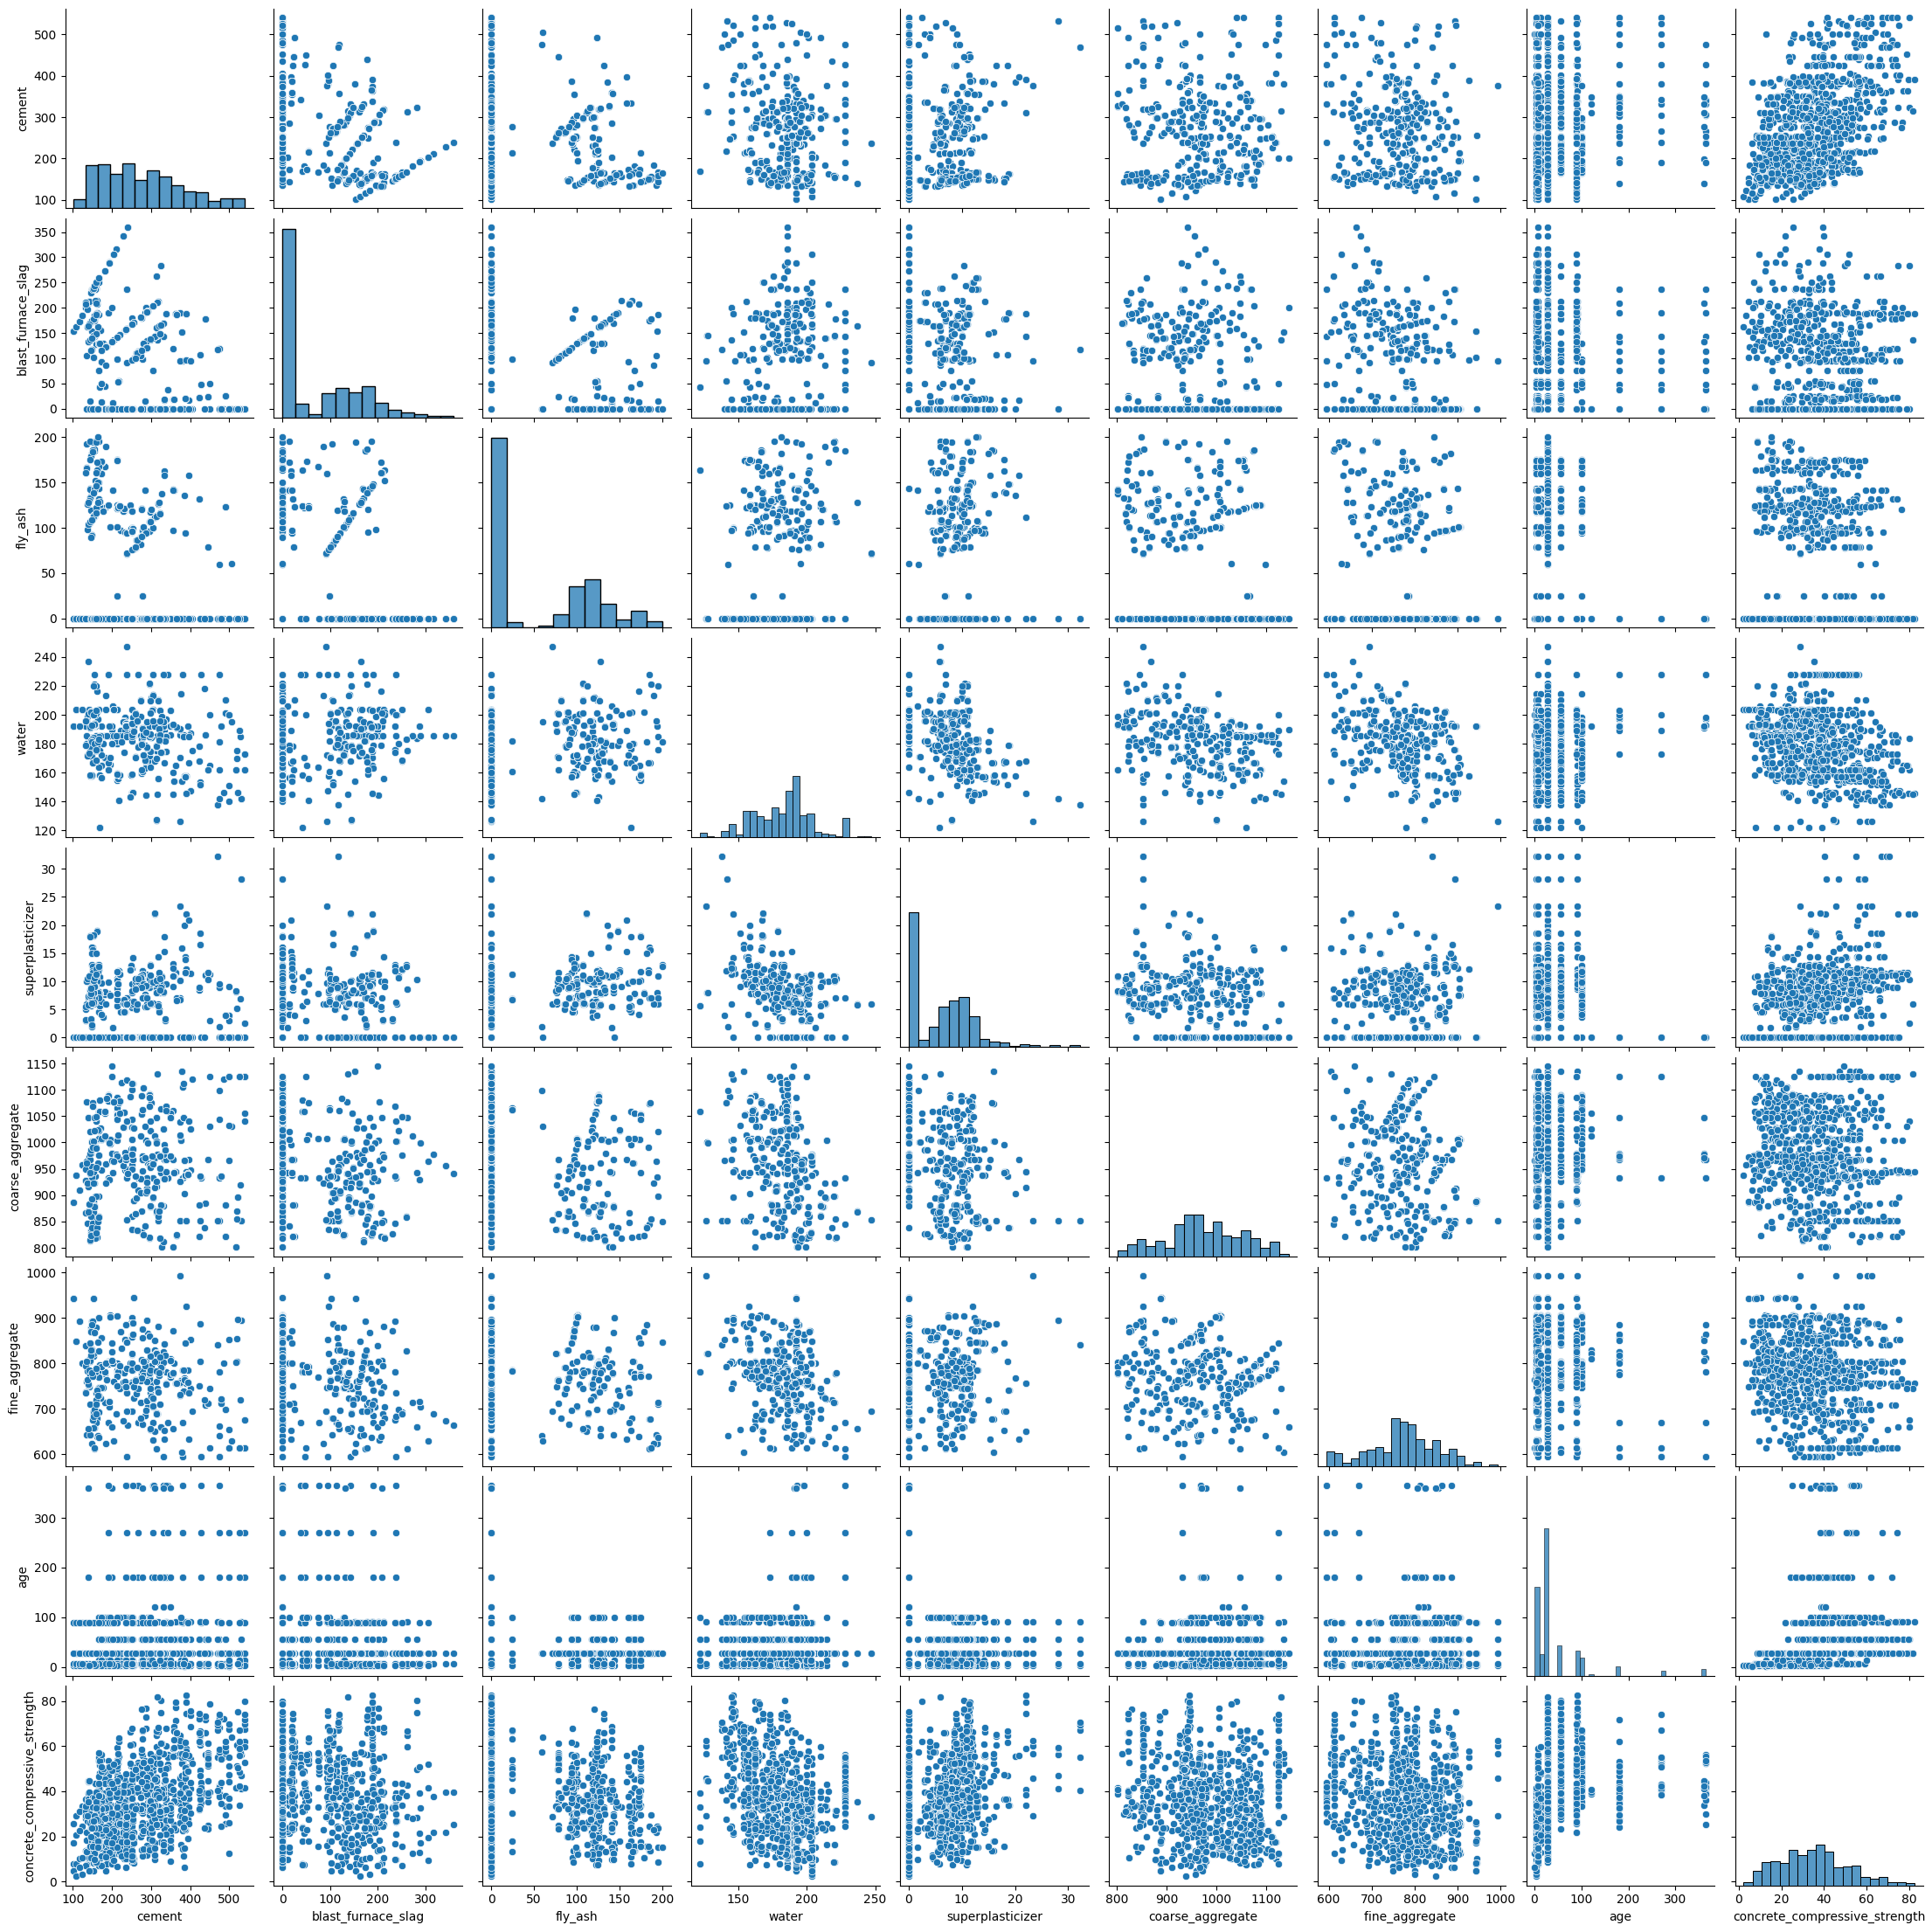

In [26]:
sns.pairplot(df, height=2.5)
plt.show()

correleation of compressive_strength between cement, age, superplasticizer are high

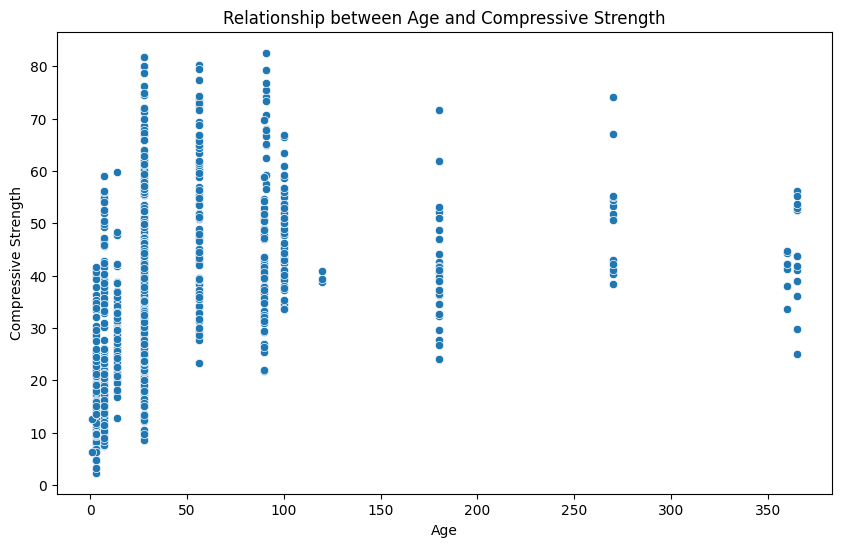

In [27]:
# Explore the relationship between age and compressive strength
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='concrete_compressive_strength', data=df)
plt.title('Relationship between Age and Compressive Strength')
plt.xlabel('Age')
plt.ylabel('Compressive Strength')
plt.show()

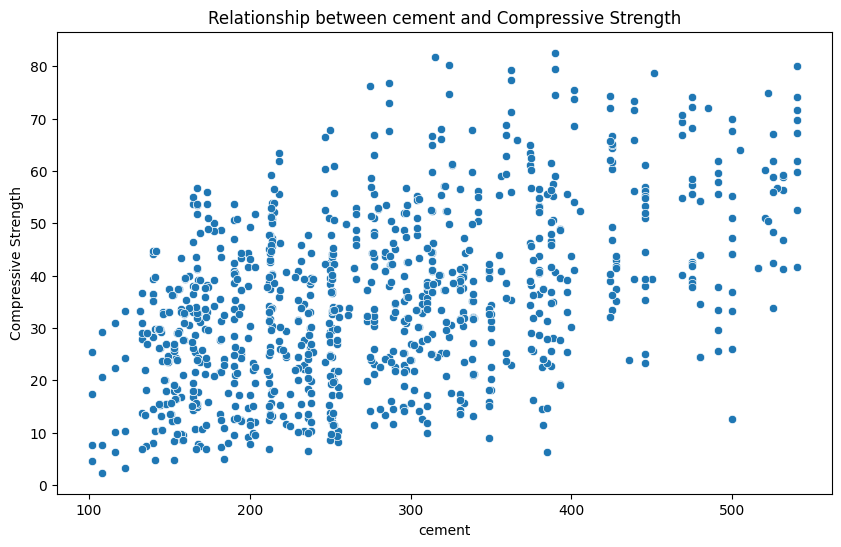

In [28]:
# Explore the relationship between cement and compressive strength
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cement', y='concrete_compressive_strength', data=df)
plt.title('Relationship between cement and Compressive Strength')
plt.xlabel('cement')
plt.ylabel('Compressive Strength')
plt.show()

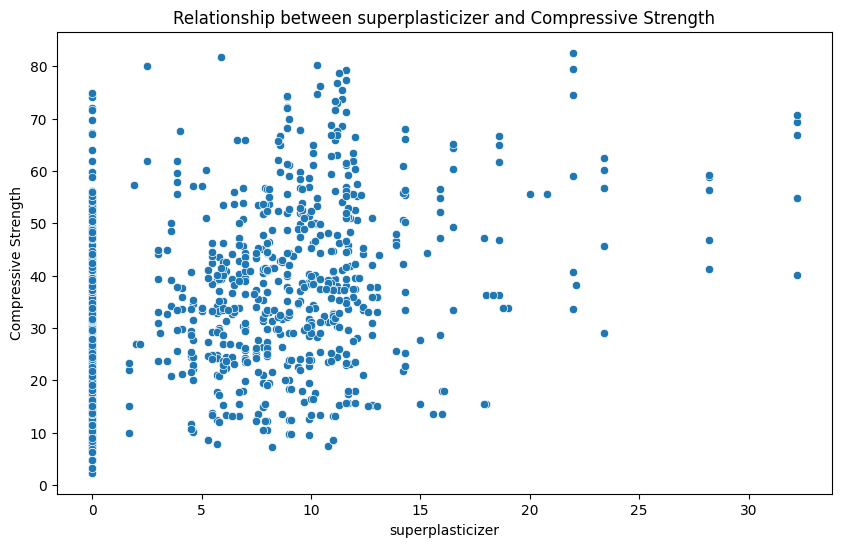

In [30]:
# Explore the relationship between age and compressive strength
plt.figure(figsize=(10, 6))
sns.scatterplot(x='superplasticizer', y='concrete_compressive_strength', data=df)
plt.title('Relationship between superplasticizer and Compressive Strength')
plt.xlabel('superplasticizer')
plt.ylabel('Compressive Strength')
plt.show()

In [43]:
def scatter_plot(x, y, df):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[x], y=df[y])
    plt.title(f'Impact of {x.title()} on {y.title()}')
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.show()

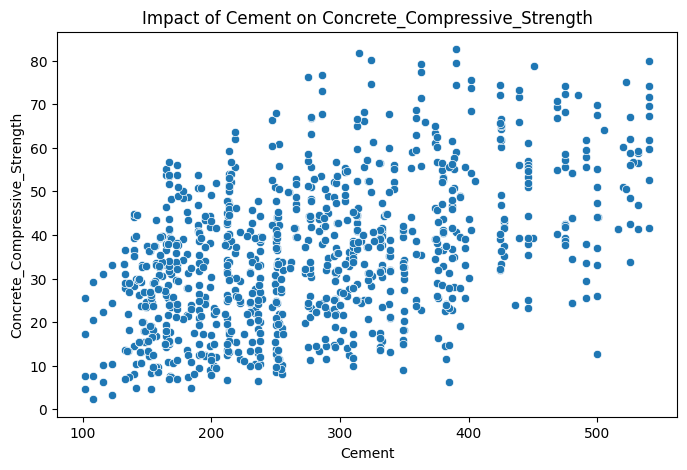

In [44]:
scatter_plot('cement','concrete_compressive_strength',df)

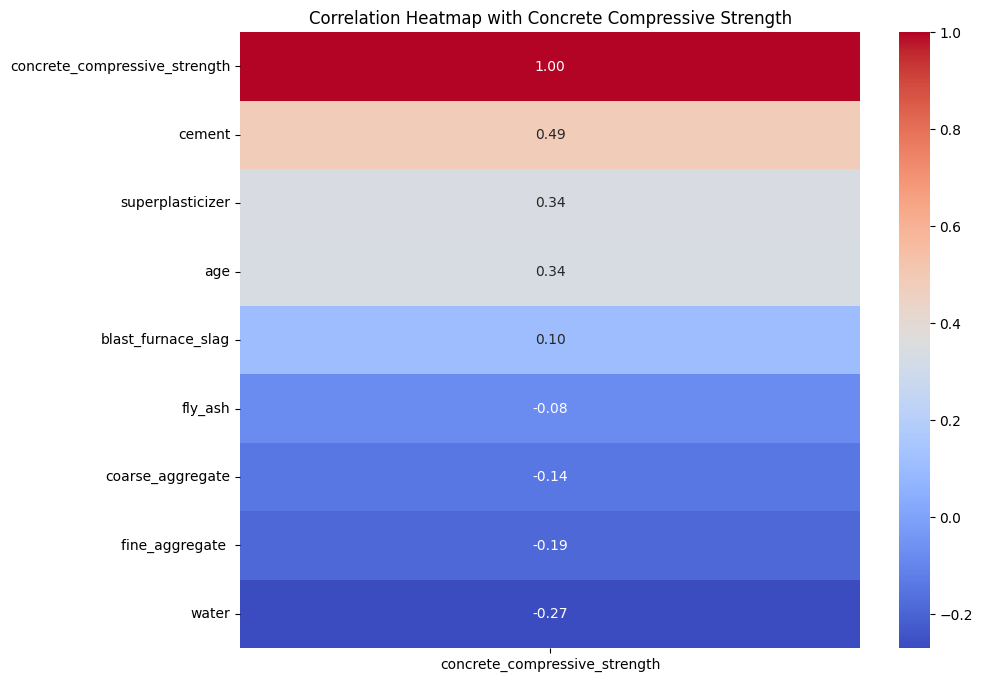

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['concrete_compressive_strength']].sort_values(by='concrete_compressive_strength', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Concrete Compressive Strength')
plt.show()

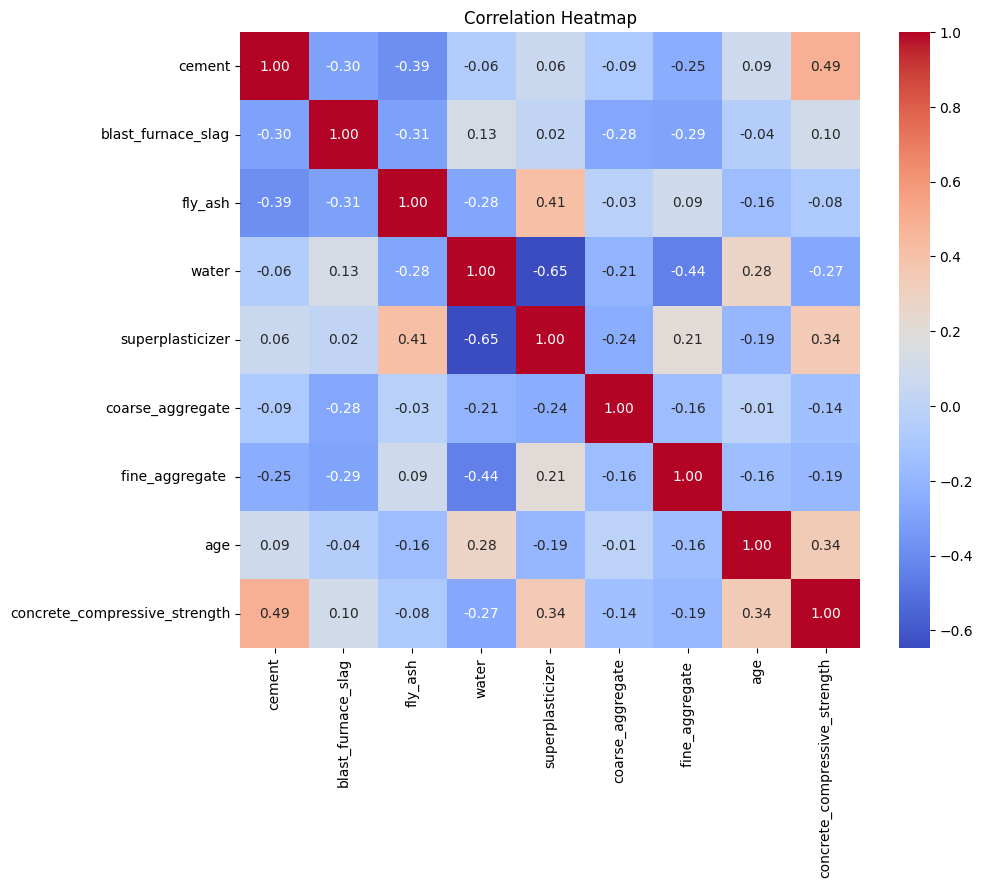

In [51]:
# Correlation heatmap to identify correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [52]:
# Function to remove outliers using IQR
def remove_outliers_iqr(column, df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

In [53]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df = remove_outliers_iqr(column, df)

In [55]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [119]:
numerical_columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age']

# Now 'numerical_columns' contains only columns with data types int64 and float64
print(numerical_columns)

['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age']


In [120]:
# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # You can use 'mean', 'median', or 'constant' strategies
        ('scaler', StandardScaler())
    ]
)

# Full Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_columns),

    ]
)

In [121]:
X = df.drop(['concrete_compressive_strength'], axis=1)
y = df["concrete_compressive_strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [122]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

728 183 728 183


In [135]:
X_train = preprocessor.fit_transform(X_train)

In [136]:
X_test = preprocessor.transform(X_test)

In [72]:
preprocessor.get_feature_names_out()

array(['num__cement', 'num__blast_furnace_slag', 'num__fly_ash',
       'num__water', 'num__superplasticizer', 'num__coarse_aggregate',
       'num__fine_aggregate ', 'num__age'], dtype=object)

In [125]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100),
    'SVR': SVR(kernel='linear'),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5)
}


In [126]:
list(models)

['LinearRegression',
 'Ridge',
 'Lasso',
 'DecisionTreeRegressor',
 'RandomForestRegressor',
 'GradientBoostingRegressor',
 'SVR',
 'KNeighborsRegressor']

In [127]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Ridge()
Lasso()
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
SVR(kernel='linear')
KNeighborsRegressor()


In [128]:
models.keys()

dict_keys(['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'SVR', 'KNeighborsRegressor'])

In [129]:
models.values()

dict_values([LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), SVR(kernel='linear'), KNeighborsRegressor()])

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)

    return {'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'R-squared': r2}


In [131]:
trained_model_list=[]
model_list = []
score_list = []

In [137]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_test_pred = model.predict(X_test)
    y_train_pred= model.predict(X_train)

    # This is a validation (test) score
    train_model_score = evaluate_regression_model(y_train, y_train_pred)
    test_model_score = evaluate_regression_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Train_Score:", train_model_score)
    print("Test_Score:", test_model_score)

    score_list.append(test_model_score)

    print('=' * 35)
    print('\n')


LinearRegression
Model Training Performance
Train_Score: {'Mean Absolute Error': 6.214717553841528, 'Mean Squared Error': 63.76993046550458, 'R-squared': 0.7423527920860601}
Test_Score: {'Mean Absolute Error': 5.2756074798954735, 'Mean Squared Error': 48.00048699511104, 'R-squared': 0.8159893744450205}


Ridge
Model Training Performance
Train_Score: {'Mean Absolute Error': 6.214441269894061, 'Mean Squared Error': 63.77273473488566, 'R-squared': 0.7423414621038726}
Test_Score: {'Mean Absolute Error': 5.280885397642608, 'Mean Squared Error': 48.05193842418332, 'R-squared': 0.8157921345784698}


Lasso
Model Training Performance
Train_Score: {'Mean Absolute Error': 6.7999705339290335, 'Mean Squared Error': 73.98621334145525, 'R-squared': 0.7010763356271412}
Test_Score: {'Mean Absolute Error': 6.590535612218473, 'Mean Squared Error': 66.6468749978225, 'R-squared': 0.744508151325987}


DecisionTreeRegressor
Model Training Performance
Train_Score: {'Mean Absolute Error': 0.11989468864468862, 

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score


# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

r2_scorer = make_scorer(r2_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring=r2_scorer, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding mean cross-validated score
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Absolute Error:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Mean Absolute Error: 0.8921668946509482


The best model is Random Forest Regressor

In [138]:
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)

RandomForestRegressor()

In [139]:
y_pred = model.predict(X_test)

In [140]:
evaluate_regression_model(y_test,y_pred)

{'Mean Absolute Error': 3.130473880431955,
 'Mean Squared Error': 18.84845020872627,
 'R-squared': 0.927744168220567}

In [141]:
import pandas as pd

def predict_compressive_strength(cement,
                                blast_furnace_slag,
                                fly_ash,
                                water,
                                superplasticizer,
                                coarse_aggregate,
                                fine_aggregate,
                                age):

    # Create a dictionary with input features
    data_dict = {
        'cement': cement,
        'blast_furnace_slag': blast_furnace_slag,
        'fly_ash': fly_ash,
        'water': water,
        'superplasticizer': superplasticizer,
        'coarse_aggregate': coarse_aggregate,
        'fine_aggregate ': fine_aggregate,
        'age': age
    }

    # Convert the dictionary to a DataFrame
    data = pd.DataFrame([data_dict])

    # Use the preprocessor to transform the data
    transformed_data = preprocessor.transform(data)

    # Use the trained model to make predictions
    predictions = model.predict(transformed_data)

    return predictions[0]


In [142]:
predict_compressive_strength(266.0,	114.0,	0.0,	228.0,	0.0,	932.0,	670.0,	28)

44.3283

In [144]:
import joblib

In [145]:
model_path = 'compressive_strength_model.joblib'
preprocessor_path = 'compressive_strength_preprocessor.joblib'

# Save the model
joblib.dump(model, model_path)

# Save the preprocessor
joblib.dump(preprocessor, preprocessor_path)

['compressive_strength_preprocessor.joblib']